In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
file = '../data/movie_ratings.csv'
df = pd.read_csv(file)

df.head(3)

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code,title,year,decade,genres,rating_year
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),1996.0,1990.0,Comedy,1997
1,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Crime,1998
2,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Film-Noir,1998


In [3]:
df.dtypes

user_id          int64
movie_id         int64
rating           int64
timestamp       object
age              int64
gender          object
occupation      object
zip_code        object
title           object
year           float64
decade         float64
genres          object
rating_year      int64
dtype: object

In [4]:
df.info

<bound method DataFrame.info of         user_id  movie_id  rating            timestamp  age gender  \
0           196       242       3  1997-12-04 15:55:49   49      M   
1           186       302       3  1998-04-04 19:22:22   39      F   
2           186       302       3  1998-04-04 19:22:22   39      F   
3           186       302       3  1998-04-04 19:22:22   39      F   
4           186       302       3  1998-04-04 19:22:22   39      F   
...         ...       ...     ...                  ...  ...    ...   
212590      716       204       5  1997-11-17 19:39:03   36      F   
212591      276      1090       1  1997-09-20 22:49:55   21      M   
212592       13       225       2  1997-12-17 22:52:36   47      M   
212593       13       225       2  1997-12-17 22:52:36   47      M   
212594       12       203       3  1997-11-19 17:13:03   28      F   

           occupation zip_code                      title    year  decade  \
0              writer    55105               Kolya

In [5]:
df.isna().sum()

user_id         0
movie_id        0
rating          0
timestamp       0
age             0
gender          0
occupation      0
zip_code        0
title           0
year           36
decade         36
genres          0
rating_year     0
dtype: int64

In [6]:
df = df.dropna(subset=['title'])
df

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code,title,year,decade,genres,rating_year
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),1996.0,1990.0,Comedy,1997
1,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Crime,1998
2,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Film-Noir,1998
3,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Mystery,1998
4,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Thriller,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212590,716,204,5,1997-11-17 19:39:03,36,F,administrator,44265,Back to the Future (1985),1985.0,1980.0,Sci-Fi,1997
212591,276,1090,1,1997-09-20 22:49:55,21,M,student,95064,Sliver (1993),1993.0,1990.0,Thriller,1997
212592,13,225,2,1997-12-17 22:52:36,47,M,educator,29206,101 Dalmatians (1996),1996.0,1990.0,Children,1997
212593,13,225,2,1997-12-17 22:52:36,47,M,educator,29206,101 Dalmatians (1996),1996.0,1990.0,Comedy,1997


In [35]:
df = df[df['title'] != "unknown"]
# Extract year again, more flexible regex
df['year'] = df['title'].str.extract(r'\((\d{4})\D*\)')[0]
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Compute decade directly
df['decade'] = (df['year'] // 10) * 10

# Check nulls
print(df.isna().sum())


user_id        0
movie_id       0
rating         0
timestamp      0
age            0
gender         0
occupation     0
zip_code       0
title          0
year           0
decade         0
genres         0
rating_year    0
dtype: int64


In [11]:
'''
## Questions to Answer
1. What's the breakdown of genres for the movies that were rated?
2. Which genres have the highest viewer satisfaction (highest ratings)? 
3. How does mean rating change across movie release years?
4. What are the 5 best-rated movies that have at least 50 ratings? At least 150 ratings?
'''

"\n## Questions to Answer\n1. What's the breakdown of genres for the movies that were rated?\n2. Which genres have the highest viewer satisfaction (highest ratings)? \n3. How does mean rating change across movie release years?\n4. What are the 5 best-rated movies that have at least 50 ratings? At least 150 ratings?\n"

Movies Genres That Were Rated In This Dataset:



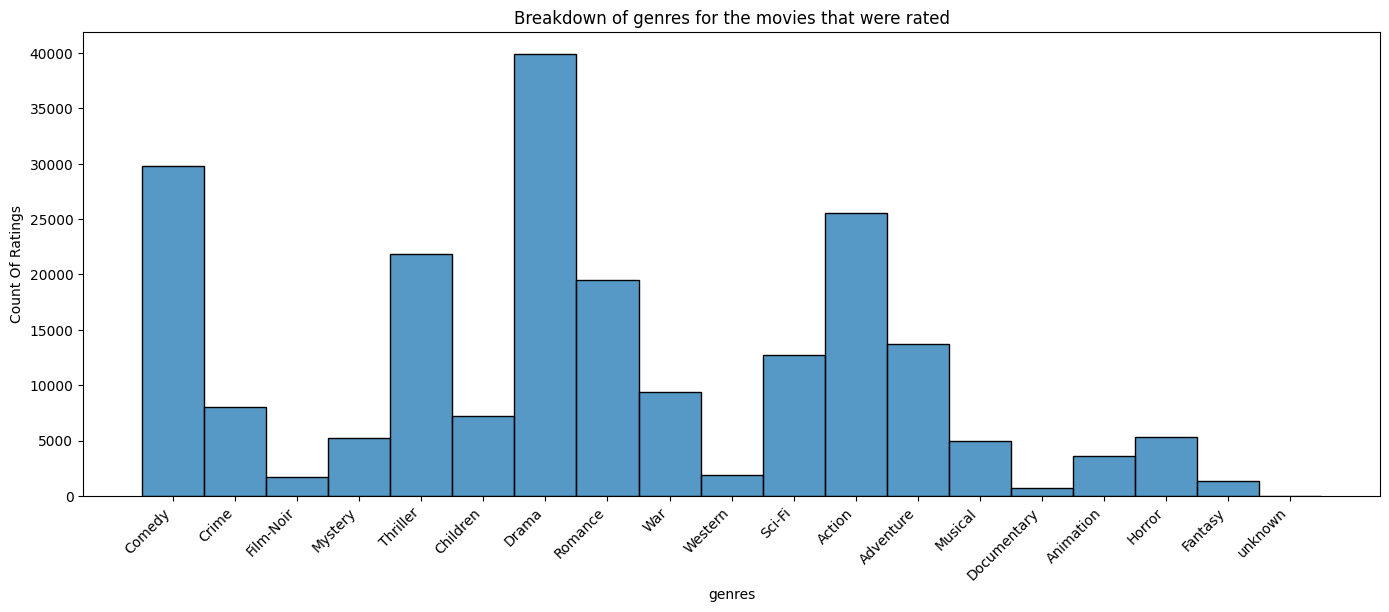

In [12]:
#  What's the breakdown of genres for the movies that were rated?
genre = df['genres'].value_counts()
genre_df = genre.reset_index()

# Rename columns
genre_df.columns = ['genre', 'count']
print(f"Movies Genres That Were Rated In This Dataset:\n")

plt.figure(figsize=(14,6))  # increase width
sns.histplot(data=df, x="genres", discrete=True)

plt.xticks(rotation=45, ha='right')  # rotate labels
plt.tight_layout()
plt.ylabel('Count Of Ratings')
plt.title("Breakdown of genres for the movies that were rated")
plt.show()

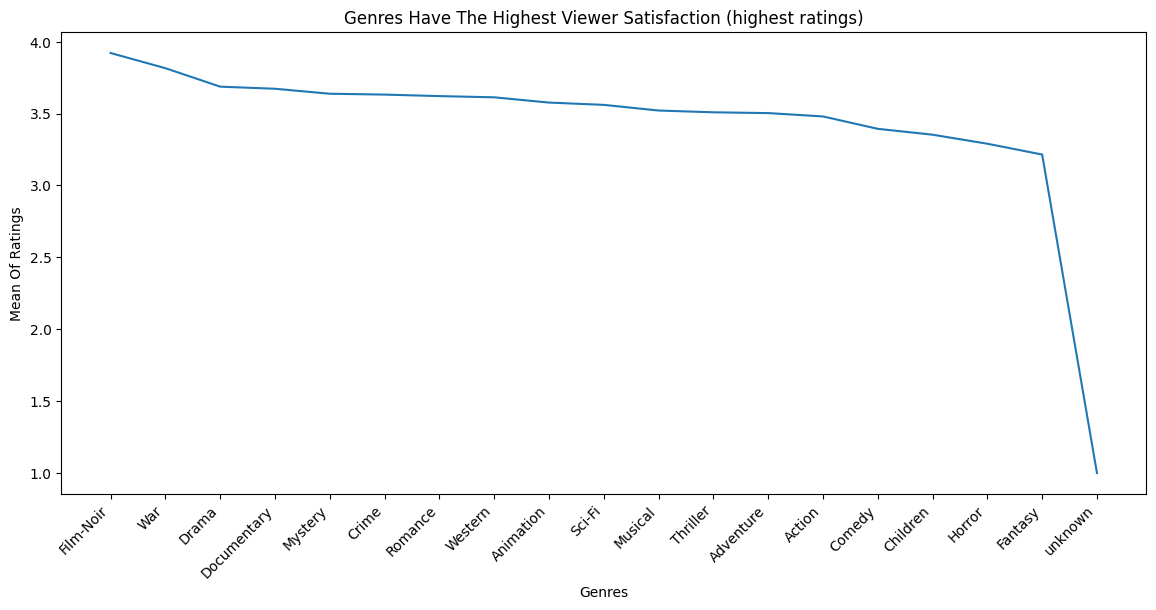

From This Graph We Can Conclude The Top Movie Genres With High Ratings Are:
       genre  avg_rating
0  Film-Noir    3.921523
1        War    3.815812


In [13]:
# Which genres have the highest viewer satisfaction (highest ratings)? 
top_movies = df.groupby('genres')['rating'].mean().sort_values(ascending=False)
top_movies_df = top_movies.reset_index()
top_movies_df.columns = ['genre', 'avg_rating']
data = top_movies_df[top_movies_df['avg_rating'] >= 3.7]
top_movies_df
plt.figure(figsize=(14,6))  # increase width
plt.plot(top_movies_df['genre'], top_movies_df['avg_rating'])
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Genres')
plt.ylabel('Mean Of Ratings')
plt.title("Genres Have The Highest Viewer Satisfaction (highest ratings)")
plt.show()

print(f"From This Graph We Can Conclude The Top Movie Genres With High Ratings Are:\n{data}")

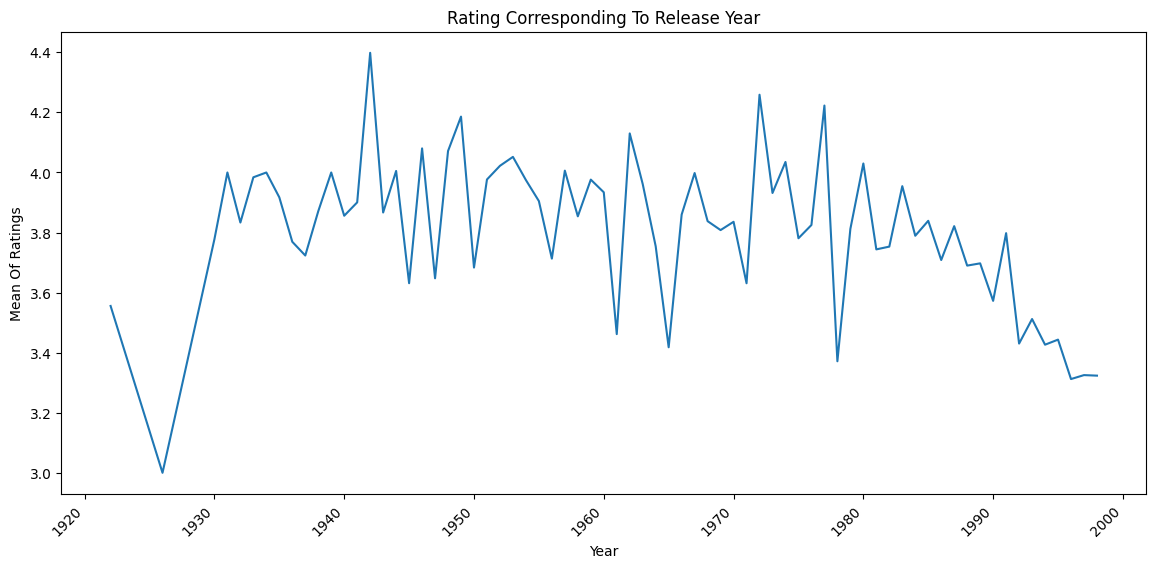

In [14]:
# How does mean rating change across movie release years?
year_ratings = df.groupby('year')['rating'].mean().sort_index()
year_ratings_df = year_ratings.reset_index()
year_ratings_df.columns = ['year', 'avg_rating']
year_ratings_df
plt.figure(figsize=(14,6))  # increase width
plt.plot(year_ratings_df['year'], year_ratings_df['avg_rating'])
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Year')
plt.ylabel('Mean Of Ratings')
plt.title("Rating Corresponding To Release Year")
plt.show()



In [15]:
# ifind lowest and highest

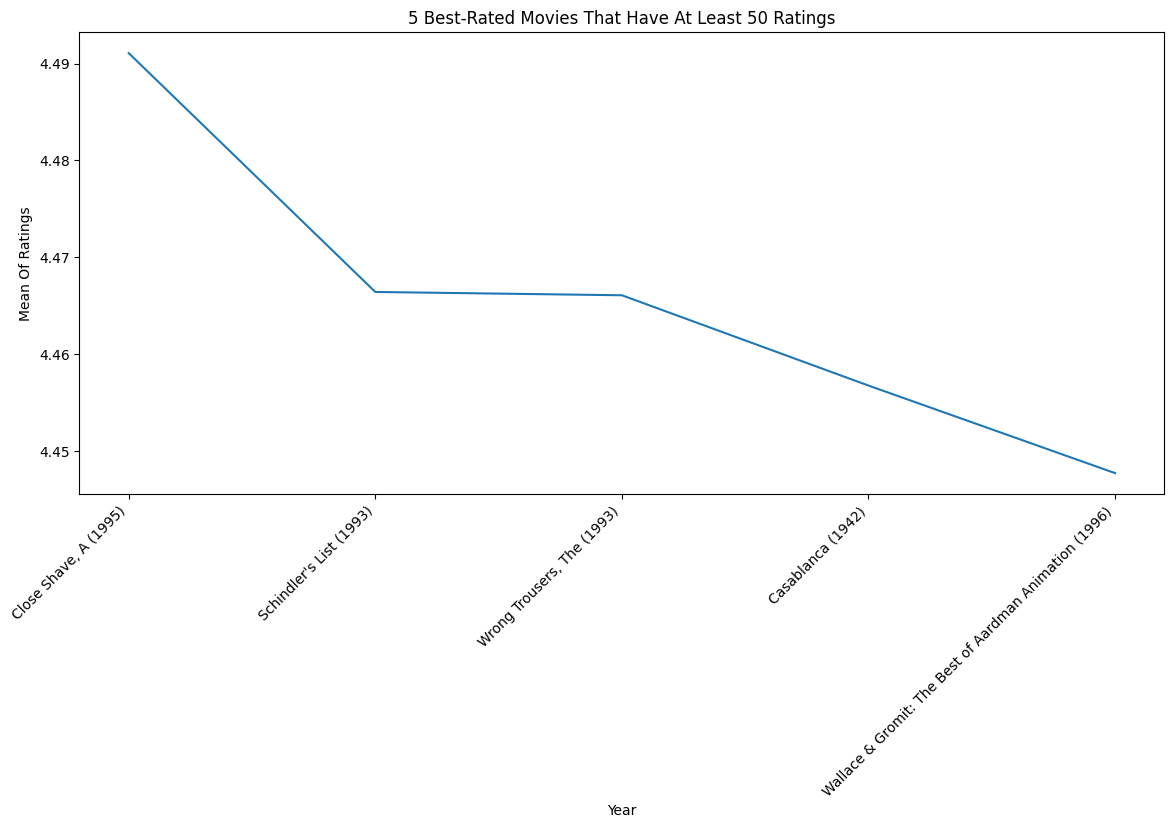

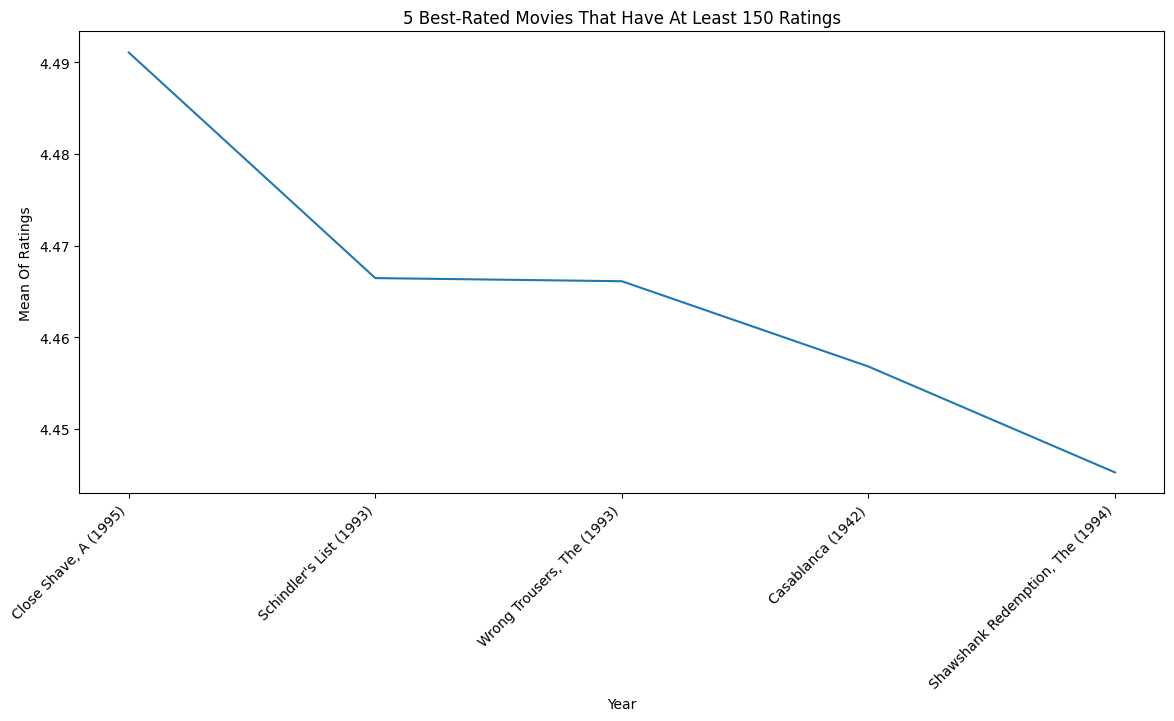

In [16]:
#  What are the 5 best-rated movies that have at least 50 ratings? At least 150 ratings?
gb = df.groupby(['title']).agg(
     year = ('year', 'first'),
    rating_mean = ('rating', 'mean'),
    rating_count = ('rating', 'count')
    ).reset_index()
gb = gb.sort_values('rating_mean', ascending=False)
gb
least_50 = gb[gb['rating_count'] >= 50].sort_values('rating_mean', ascending=False)
least_150 = gb[gb['rating_count'] >= 150].sort_values('rating_mean', ascending=False)
data_50 = least_50.head(5)
plt.figure(figsize=(14,6))  # increase width
plt.plot(data_50['title'], data_50['rating_mean'])
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Year')
plt.ylabel('Mean Of Ratings')
plt.title("5 Best-Rated Movies That Have At Least 50 Ratings")
plt.show()
data_150 = least_150.head(5)
plt.figure(figsize=(14,6))  # increase width
plt.plot(data_150['title'], data_150['rating_mean'])
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Year')
plt.ylabel('Mean Of Ratings')
plt.title("5 Best-Rated Movies That Have At Least 150 Ratings")
plt.show()

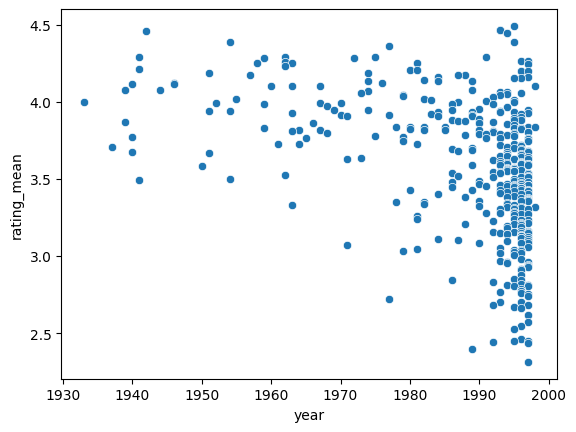

In [17]:
ax = sns.scatterplot(data=least_150, x='year', y='rating_mean');

extra credit not complete, still playing with data

In [18]:
'''
5. Pick 4 genres. For each genre, how does the rating change as viewer age increases?
   - Suggestion: try to do this for more than 4 genres and see which have the most interesting visualization.
6. Plot number of ratings vs mean rating per genre. Is there a correlation between the volume of ratings and mean rating?
7. We gave you a pre-cleaned `genres` column, the original dataset is `movie_ratings_EC.csv`, can you clean it yourself?
   - Hint: Use `.explode()` 
'''

'\n5. Pick 4 genres. For each genre, how does the rating change as viewer age increases?\n   - Suggestion: try to do this for more than 4 genres and see which have the most interesting visualization.\n6. Plot number of ratings vs mean rating per genre. Is there a correlation between the volume of ratings and mean rating?\n7. We gave you a pre-cleaned `genres` column, the original dataset is `movie_ratings_EC.csv`, can you clean it yourself?\n   - Hint: Use `.explode()` \n'

In [19]:
file = "../data/movie_ratings_EC.csv"
df2 = pd.read_csv(file)
df2

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code,title,year,decade,genres,rating_year
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),1996.0,1990.0,Comedy,1997
1,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Crime|Film-Noir|Mystery|Thriller,1998
2,22,377,1,1997-11-07 07:18:36,25,M,writer,40206,Heavyweights (1994),1994.0,1990.0,Children|Comedy,1997
3,244,51,2,1997-11-27 05:02:03,28,M,technician,80525,Legends of the Fall (1994),1994.0,1990.0,Drama|Romance|War|Western,1997
4,166,346,1,1998-02-02 05:33:16,47,M,educator,55113,Jackie Brown (1997),1997.0,1990.0,Crime|Drama,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,880,476,3,1997-11-22 05:10:44,13,M,student,83702,"First Wives Club, The (1996)",1996.0,1990.0,Comedy,1997
99996,716,204,5,1997-11-17 19:39:03,36,F,administrator,44265,Back to the Future (1985),1985.0,1980.0,Comedy|Sci-Fi,1997
99997,276,1090,1,1997-09-20 22:49:55,21,M,student,95064,Sliver (1993),1993.0,1990.0,Thriller,1997
99998,13,225,2,1997-12-17 22:52:36,47,M,educator,29206,101 Dalmatians (1996),1996.0,1990.0,Children|Comedy,1997


In [20]:
df2.dtypes

user_id          int64
movie_id         int64
rating           int64
timestamp       object
age              int64
gender          object
occupation      object
zip_code        object
title           object
year           float64
decade         float64
genres          object
rating_year      int64
dtype: object

The rates increase as the age increases
Axes(0.125,0.11;0.775x0.77)


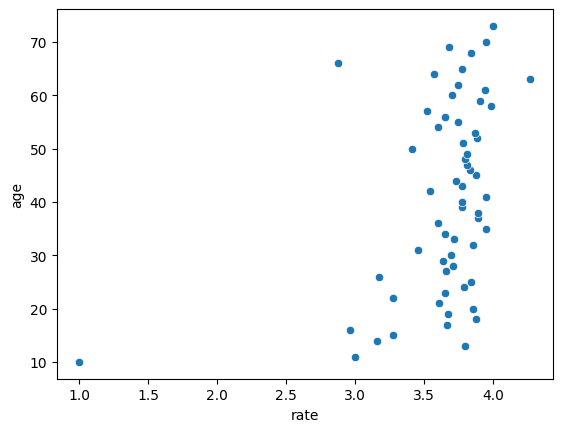

In [21]:
drama = df2[df2['genres'] == 'Drama']

gb = drama.groupby('age').agg(
    rate = ('rating' , 'mean')
)
test = sns.scatterplot(
    data = gb,
    x='rate',
    y = 'age'
);
print(f"The rates increase as the age increases\n{test}")

The rates increase as the age increases
Axes(0.125,0.11;0.775x0.77)


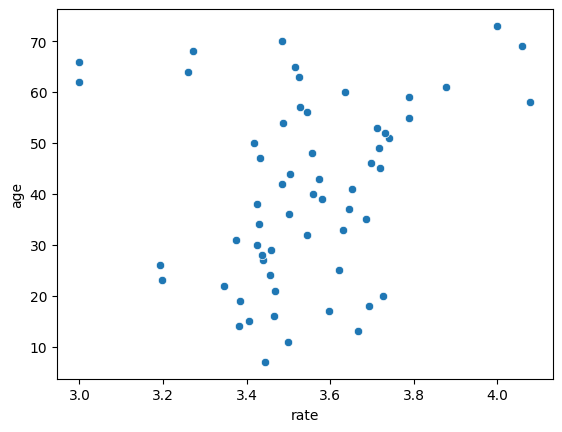

In [22]:
thrill = df[df['genres'] == 'Thriller']
gb = thrill.groupby('age').agg(
    rate = ('rating' , 'mean')
)
test = sns.scatterplot(
    data = gb,
    x='rate',
    y = 'age'
);
print(f"The rates increase as the age increases\n{test}")

The rates increase as the age increases
Axes(0.125,0.11;0.775x0.77)


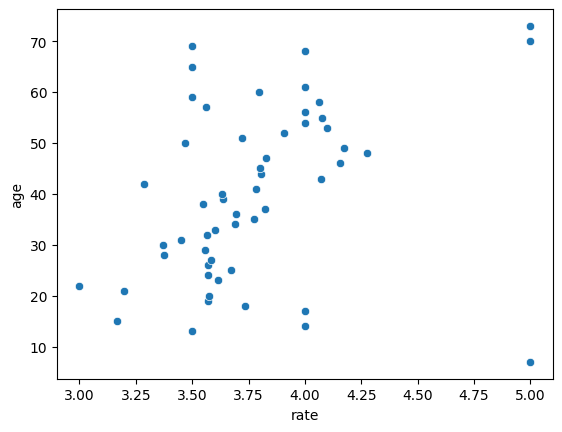

In [23]:
west = df[df['genres'] == 'Western']
gb = west.groupby('age').agg(
    rate = ('rating' , 'mean')
)
test = sns.scatterplot(
    data = gb,
    x='rate',
    y = 'age'
);
print(f"The rates increase as the age increases\n{test}")

The rates increase as the age increases
Axes(0.125,0.11;0.775x0.77)


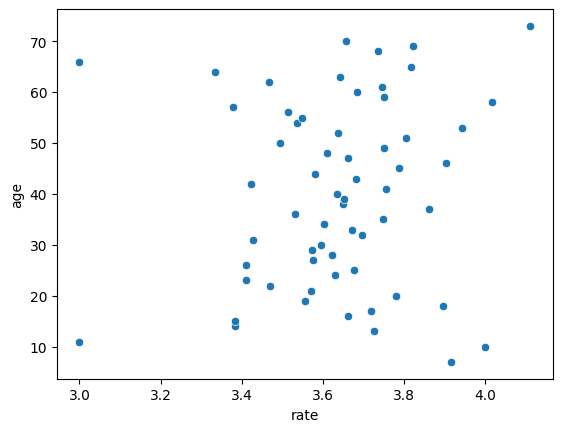

In [24]:
romance = df[df['genres'] == 'Romance']
gb = romance.groupby('age').agg(
    rate = ('rating' , 'mean')
)
test = sns.scatterplot(
    data = gb,
    x='rate',
    y = 'age'
);
print(f"The rates increase as the age increases\n{test}")